<a href="https://colab.research.google.com/github/Neelov12/MAT-422/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation

> Indented block



# Contents:

> 2.4.1: MLE for Random Samples

> 2.4.2: Linear Regression




In both sections, I will demonstrate the idea of linear regression using MLE by using a dataset of comparing annual car insurance rates with age and sex from data collected by [Bankrate](https://www.bankrate.com/insurance/car/auto-insurance-rates-by-age/#age)

# 2.4.1: MLE for Random Samples

Let's initialize and plot the data

In [60]:
import matplotlib.pyplot as plt
import numpy as np

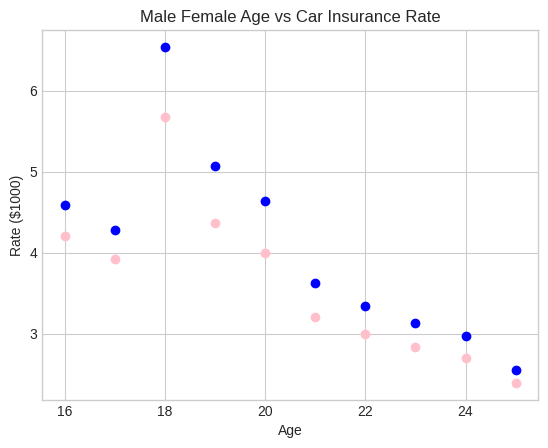

In [62]:
# Data for age
age = np.arange(16, 26)

#rates for males
m_rates = np.array([4.584, 4.285, 6.541, 5.075, 4.638, 3.629, 3.337, 3.137, 2.974, 2.552])

#rates for females
f_rates = np.array([4.201, 3.919, 5.679, 4.365, 3.999, 3.211, 2.990, 2.833, 2.700, 2.393])

plt.title("Male Female Age vs Car Insurance Rate")
plt.xlabel("Age")
plt.ylabel("Rate ($1000)")
plt.scatter(age, m_rates, color ="blue")
plt.scatter(age, f_rates, color ="pink")
plt.show()

Let's determine mean and variance of the data

In [63]:
print("Male Mean: ")
print(np.mean(m_rates))
print("\nFemale Mean: ")
print(np.mean(f_rates))
print("\nMale Variance: ")
m_variance = np.var(m_rates)
print(m_variance)
print("\nFemale Variance: ")
f_variance = np.var(f_rates)
print(f_variance)

Male Mean: 
4.075200000000001

Female Mean: 
3.6290000000000004

Male Variance: 
1.28564396

Female Variance: 
0.8899778000000002


This demonstrates the following:

$ \hat \mu = \bar X $,

$ \hat \sigma ^2 = \frac{\Sigma (X_i - \bar X) ^2}{n} $

# 2.4.2: Linear Regression

Next, let's find a line of best fit using MLE to demonstrate the following concept:



Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$, we seek an affine function to fit the data and each $\mathbf{x}_{i}=\left(x_{i 1}, \ldots, x_{i p}\right)$. The common approach involves finding coefficients $\beta_{j}, j=1 \ldots, p$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}
$$
Now we wish to discuss it from a probabilistic point of view by the maximum likelihood estimation. Consider that we have $n$ points, each of which is drawn in an independent and identically distributed (i.i.d.) way from the normal distribution. For a given, $\mu, \sigma^{2}$, the probability of those $n$ points being drawn define the likelihood function, which are just the multiplication of $n$ normal probability density functions (pdf) (because they are independent).
$$
\mathscr{P}(\mu \mid y)=\prod_{i=1}^{n} P_{Y}\left(y_{i} \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}}
$$
Now understand that $y$ is a random variable.
$$
y_{i}=\hat{y}_{i}+\varepsilon
$$
where $\varepsilon \sim N\left(0, \sigma^{2}\right)$. Thus, $y_{i}$ is a normal variable with mean as a linear function of $\mathbf{x}$ and a fixed standard deviation:
$$
y_{i} \sim N\left(\hat{y}_{i}, \sigma^{2}\right)
$$
As a result, for each $y_{i}$, we choose $\mu$ in the normal distributions in (2.4.2) as
$$
\mu_{i}=\hat{y}_{i}
$$
Hence we derive the maximum likelihood estimate
$$
\begin{aligned}
\hat{\beta}=\arg \max \mathscr{P}(\beta \mid y) &=\arg \max _{\beta} \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}} \\
&=\arg \max _{\beta} \log \left(\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(\frac{1}{\sigma \sqrt{2 \pi}}\right)+\log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n}-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}} \\
&=\arg \min _{\beta} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\end{aligned}
$$
which is exactly the least square problem we discussed before.

Let's create an arbitrary regression line

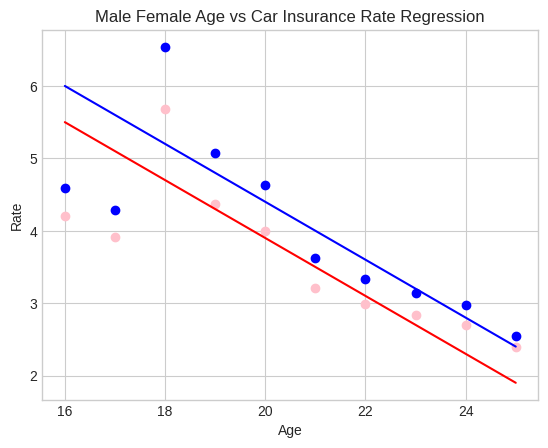

In [67]:
m_slope = -.4
m_intercept = -16*m_slope + 6
m_y = m_slope*age + m_intercept

f_slope = -.4
f_intercept = -16*f_slope + 5.5
f_y = f_slope*age + f_intercept

plt.title("Male Female Age vs Car Insurance Rate Regression")
plt.xlabel("Age")
plt.ylabel("Rate")
plt.scatter(age, m_rates, color ="blue")
plt.scatter(age, f_rates, color ="pink")
plt.plot(age, m_y, color = "blue")
plt.plot(age, f_y, color = "red")
plt.show()

Let's estimate the accuracy of these regression lines using the following equation

$$
\mathscr{P}(\mu \mid y)=\prod_{i=1}^{n} P_{Y}\left(y_{i} \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}}
$$

In [68]:
import math

Function to determine estimate based on likelihood equation

In [124]:
def density_function(x, y, v, reg_slope, reg_int):
  # x - x axis (as numpy)
  # y - y axis (as numpy)
  # v - variance
  # reg_slope - Regression slope
  # reg_int - Regression intercept

  normal = 1/(math.sqrt(2*math.pi*v))
  mle = 0.0
  f_y = 0.0
  est = 1.0
  ssr = 0.0

  for i in range(0, np.prod(x.shape)):
    mle = -((y[i] - (reg_int + reg_slope*x[i]))**2/(2*v))
    f_y = normal*math.e**(mle)
    est = est * f_y
    ssr += (y[i] - (reg_int + reg_slope*x[i]))**2

  return est

Function to determine estimate based on sum of squared regressions

In [125]:
def sum_sq_res(x, y, v, reg_slope, reg_int):
  # x - x axis (as numpy)
  # y - y axis (as numpy)
  # v - variance
  # reg_slope - Regression slope
  # reg_int - Regression intercept

  ssr = 0.0

  for i in range(0, np.prod(x.shape)):
    ssr += (y[i] - (reg_int + reg_slope*x[i]))**2

  return ssr

In [126]:

m_est = density_function(age, m_rates, m_variance, m_slope, m_intercept)
m_ssr = sum_sq_res(age, m_rates, m_variance, m_slope, m_intercept)

f_est = density_function(age, f_rates, f_variance, f_slope, f_intercept)
f_ssr = sum_sq_res(age, f_rates, f_variance, f_slope, f_intercept)

print("Likelihood Estimate (Male): ")
print(m_est)
print("")
print("Sum of squared residuals (Male)")
print(m_ssr)
print("")
print("Likelihood Estimate (Female): ")
print(f_est)
print("")
print("Sum of squared residuals (Female)")
print(f_ssr)

Likelihood Estimate (Male): 
2.8978877889527524e-06

Sum of squared residuals (Male)
5.928990000000001

Likelihood Estimate (Female): 
1.4025599347743317e-05

Sum of squared residuals (Female)
4.570988000000002


As we can see, our estimate indicates that our arbitrary regression line was very inaccurate

Let us find the optimal slope and intercepts for the regression line to determine the most accurate estimate

Most accurate slope
-0.4039999999999999


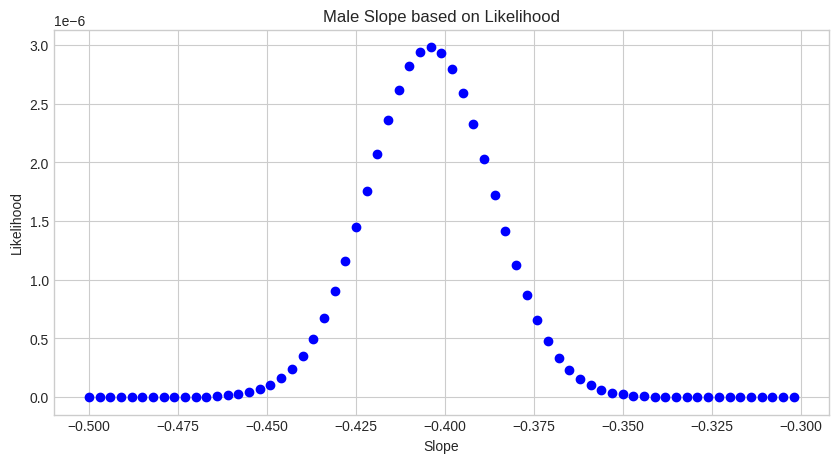

In [192]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(m_slope - 0.1, m_slope + 0.1, 0.003)
y = (density_function(age, m_rates, m_variance, x, m_intercept))

plt.title("Male Slope based on Likelihood")
plt.xlabel("Slope")
plt.ylabel("Likelihood")
plt.scatter(x, y, color = "blue")

i = np.argmax(y)
print("Most accurate slope")
print(x[i])

Most accurate intercept
12.300000000000027


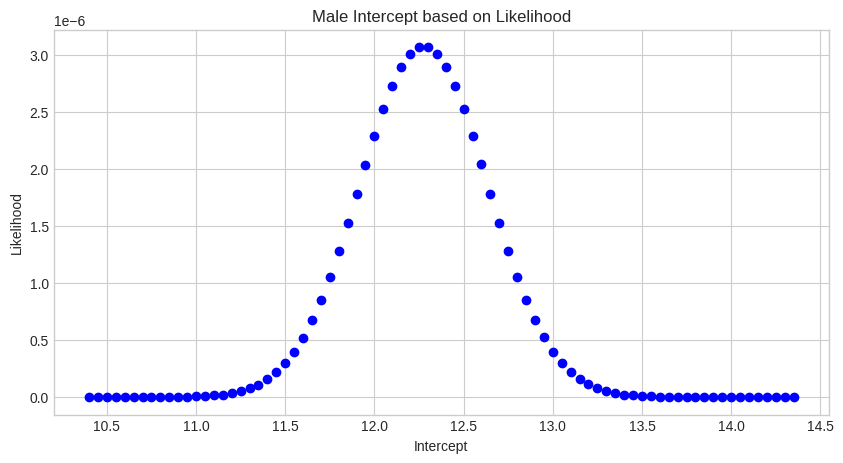

In [193]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(m_intercept - 2, m_intercept + 2, 0.05)
y = (density_function(age, m_rates, m_variance, m_slope, x))

plt.title("Male Intercept based on Likelihood")
plt.xlabel("Intercept")
plt.ylabel("Likelihood")
plt.scatter(x, y, color = "blue")

i = np.argmax(y)
print("Most accurate intercept")
print(x[i])

Most accurate slope
-0.4039999999999999


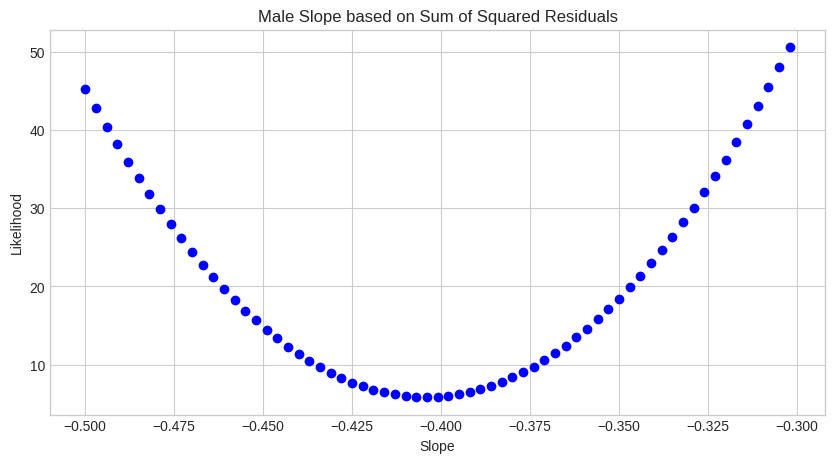

In [194]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(m_slope - 0.1, m_slope + 0.1, 0.003)
y = (sum_sq_res(age, m_rates, m_variance, x, m_intercept))

plt.title("Male Slope based on Sum of Squared Residuals")
plt.xlabel("Slope")
plt.ylabel("Likelihood")
plt.scatter(x, y, color = "blue")

i = np.argmin(y)
print("Most accurate slope")
print(x[i])

Most accurate intercept
12.300000000000027


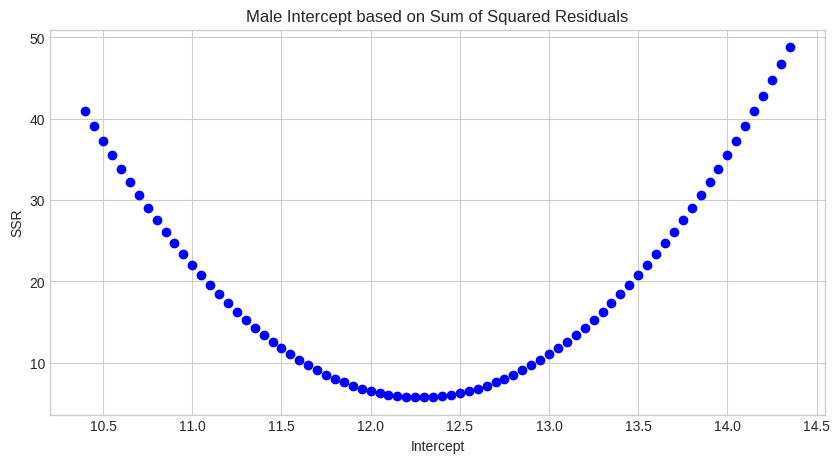

In [200]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(m_intercept - 2, m_intercept + 2, 0.05)
y = (sum_sq_res(age, m_rates, m_variance, m_slope, x))
plt.title("Male Intercept based on Sum of Squared Residuals")
plt.xlabel("Intercept")
plt.ylabel("SSR")
plt.scatter(x, y, color = "blue")

i = np.argmin(y)
print("Most accurate intercept")
print(x[i])

Most accurate slope
-0.4009999999999999


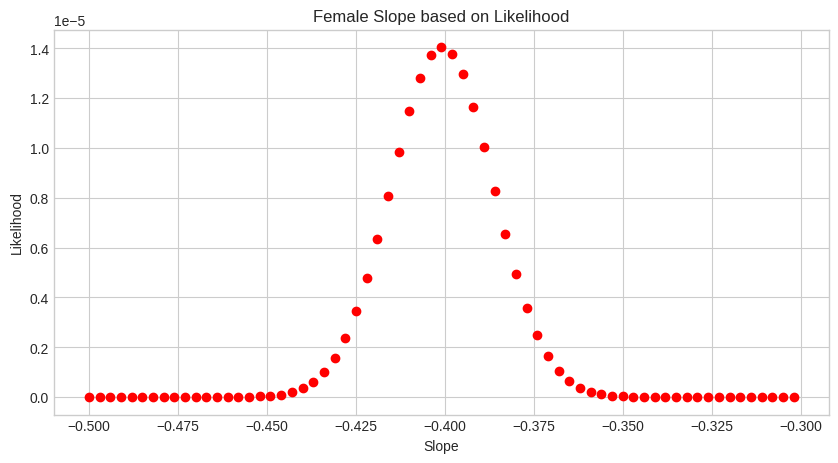

In [196]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(f_slope - 0.1, f_slope + 0.1, 0.003)
y = (density_function(age, f_rates, f_variance, x, f_intercept))

plt.title("Female Slope based on Likelihood")
plt.xlabel("Slope")
plt.ylabel("Likelihood")
plt.scatter(x, y, color = "red")

i = np.argmax(y)
print("Most accurate slope")
print(x[i])

Most accurate intercept
11.850000000000028


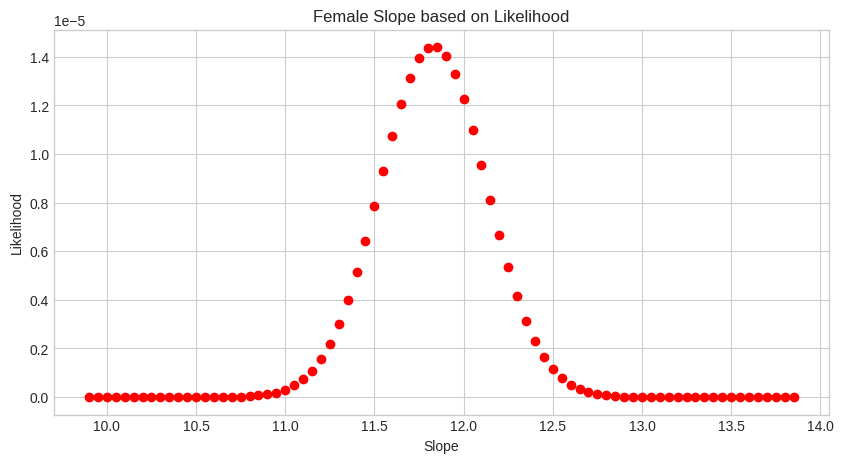

In [197]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(f_intercept - 2, f_intercept + 2, 0.05)
y = (density_function(age, f_rates, f_variance, f_slope, x))
plt.title("Female Slope based on Likelihood")
plt.xlabel("Slope")
plt.ylabel("Likelihood")
plt.scatter(x, y, color = "red")

i = np.argmax(y)
print("Most accurate intercept")
print(x[i])

Most accurate slope
-0.400000000000007


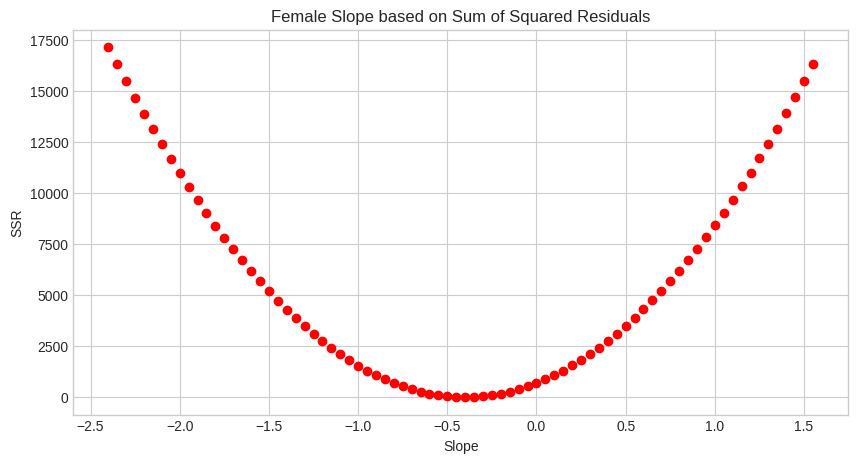

In [198]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(f_slope - 2, f_slope + 2, 0.05)
y = (sum_sq_res(age, f_rates, f_variance, x, f_intercept))
plt.title("Female Slope based on Sum of Squared Residuals")
plt.xlabel("Slope")
plt.ylabel("SSR")
plt.scatter(x, y, color = "red")

i = np.argmin(y)
print("Most accurate slope")
print(x[i])

Most accurate intercept
11.850000000000028


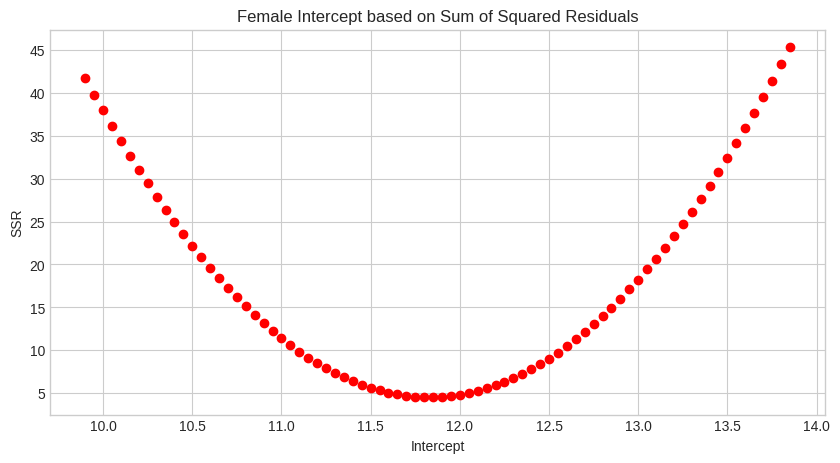

In [199]:
fig, ax = plt.subplots(1, 1, figsize =(10, 5))

x = np.arange(f_intercept - 2, f_intercept + 2, 0.05)
y = (sum_sq_res(age, f_rates, f_variance, f_slope, x))
plt.title("Female Intercept based on Sum of Squared Residuals")
plt.xlabel("Intercept")
plt.ylabel("SSR")
plt.scatter(x, y, color = "red")

i = np.argmin(y)
print("Most accurate intercept")
print(x[i])

Here we see from the graphs that the most accurate slopes and intercepts for

> **Male** $ m = -0.4039999999999999, b = 12.300000000000027 $
> **Female** $ m = -0.400000000000007, b = 11.850000000000028 $

Readjusting the original regression, we find

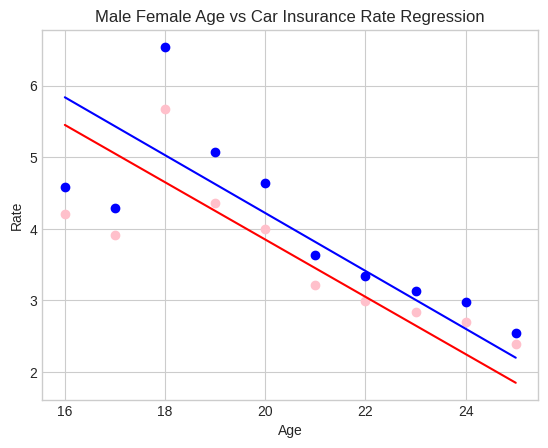

In [201]:
m_slope = -0.4039999999999999
m_intercept = 12.300000000000027
m_y = m_slope*age + m_intercept

f_slope = -0.400000000000007
f_intercept = 11.850000000000028
f_y = f_slope*age + f_intercept

plt.title("Male Female Age vs Car Insurance Rate Regression")
plt.xlabel("Age")
plt.ylabel("Rate")
plt.scatter(age, m_rates, color ="blue")
plt.scatter(age, f_rates, color ="pink")
plt.plot(age, m_y, color = "blue")
plt.plot(age, f_y, color = "red")
plt.show()

So, we have found an accurate estimate for the regression lines of male vs female drivers from age 16 to 25, and can determine that typically, males from ages 16 to 25 pay greater car insurance rates